## Step 4.5 Explanation and Model Descriptions Additionlal Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load the Data set
df=pd.read_csv('Group_14_Clean_Data.csv')
df.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Powerall
0,316.5855,223.9277,182.3434,551.5497,7.8641,243.1339,361.0877,115.9284,78.6087,468.3799,...,82322.0277,98069.1011,86578.6330,93016.4133,63145.1829,98353.1952,80225.1390,98447.2846,97570.2225,1370374.145
1,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,83920.1033,80968.0044,87108.1328,68065.1856,99061.3812,77549.1426,99013.1628,78234.4337,84633.6493,1340929.765
2,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,97358.7395,93437.7170,69940.2554,92864.1192,60887.8095,72306.6556,81151.1515,83030.9726,94779.6131,1352031.511
3,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,280.2195,319.1130,...,80399.3841,89349.6141,85048.3860,70038.2271,92797.3569,97653.8121,74903.3740,71690.6549,96220.4768,1396754.375
4,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,97088.1761,81187.3982,63591.6729,92418.1977,82454.8256,97091.7749,85937.5437,66823.1572,93683.0996,1355708.577


In [3]:
# Define features and target variable

X = df.drop(columns=['Powerall']) 
y = df['Powerall'] 

In [4]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Perform scaling after splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 4.1: Model Evaluation and Comparison

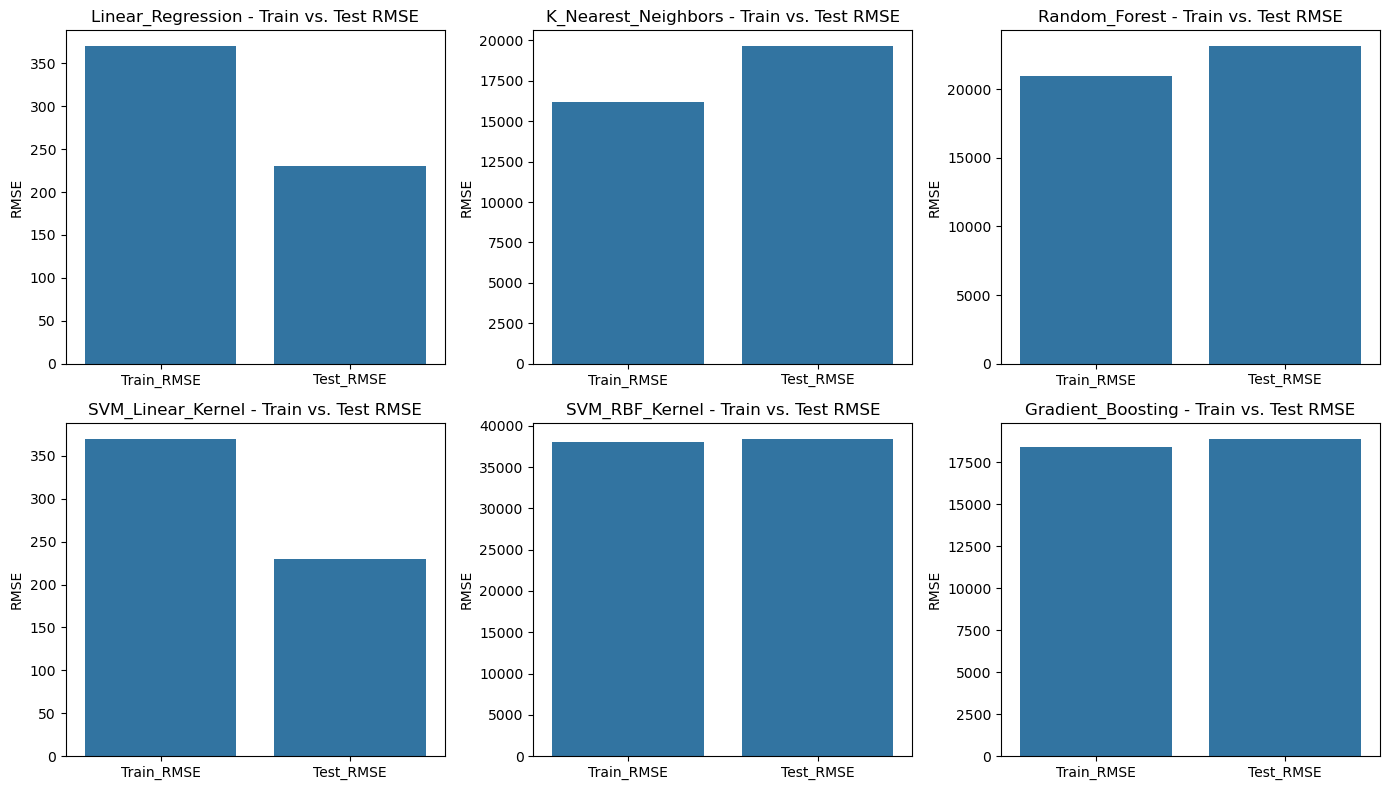

In [11]:
# Visualization - Train vs Test RMSE
plt.figure(figsize=(14, 8))
for i, (model_name, model_results) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=['Train_RMSE', 'Test_RMSE'], y=[model_results["Train_RMSE"], model_results["Test_RMSE"]])
    plt.title(f'{model_name} - Train vs. Test RMSE')
    plt.ylabel("RMSE")
plt.tight_layout()
plt.show()

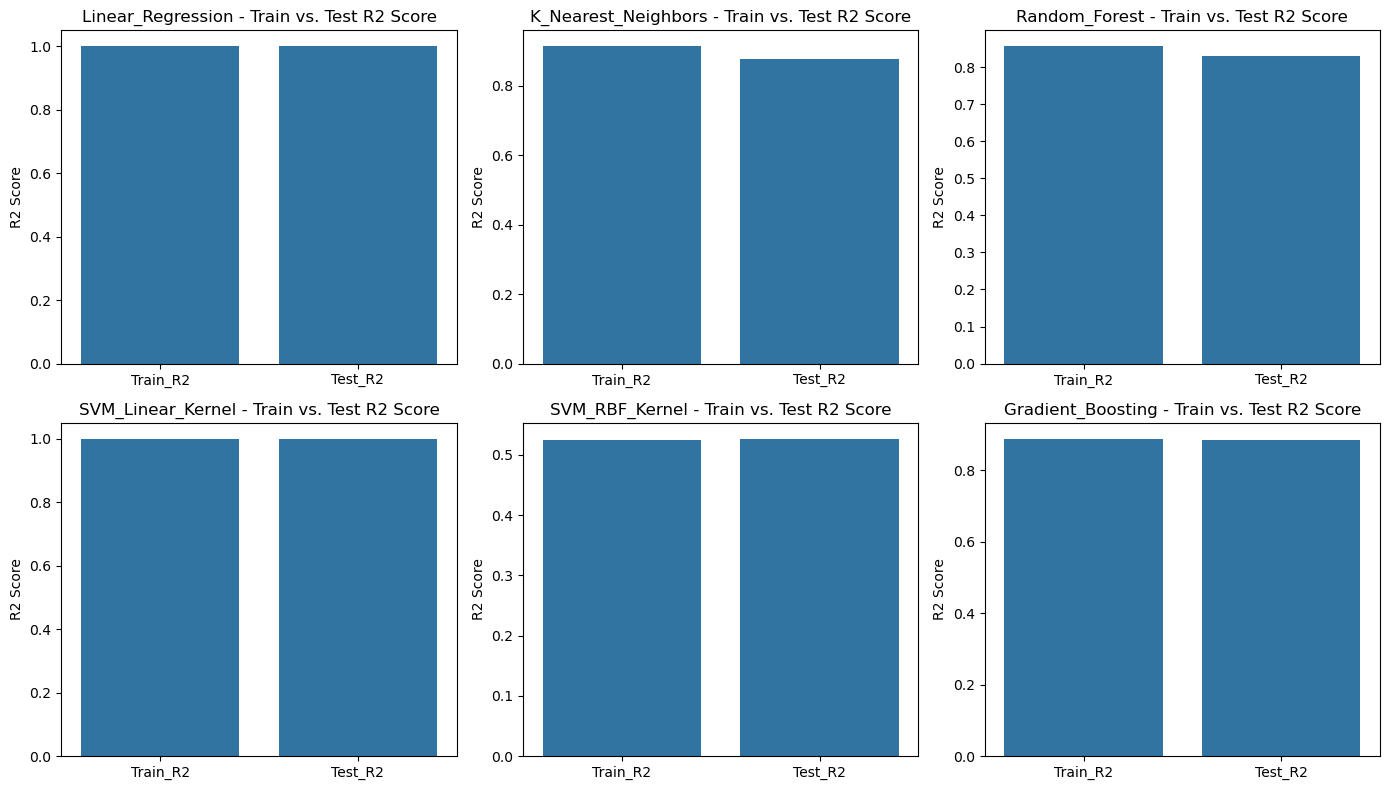

In [12]:
# Visualization - Train vs Test R2 Score
plt.figure(figsize=(14, 8))
for i, (model_name, model_results) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=['Train_R2', 'Test_R2'], y=[model_results["Train_R2"], model_results["Test_R2"]])
    plt.title(f'{model_name} - Train vs. Test R2 Score')
    plt.ylabel("R2 Score")
plt.tight_layout()
plt.show()

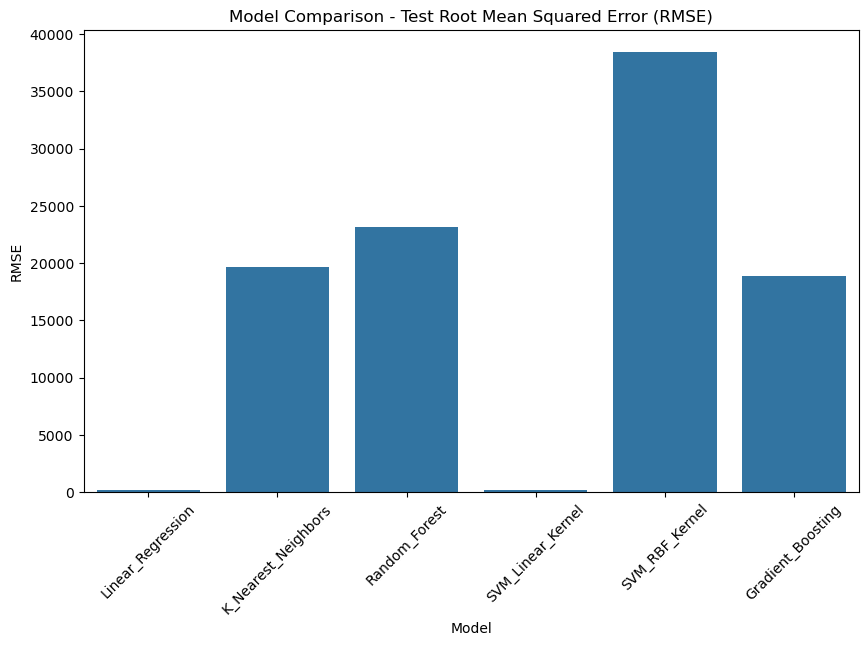

In [13]:
# Visualization - Test RMSE Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["Test_RMSE"])
plt.title("Model Comparison - Test Root Mean Squared Error (RMSE)")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.show()

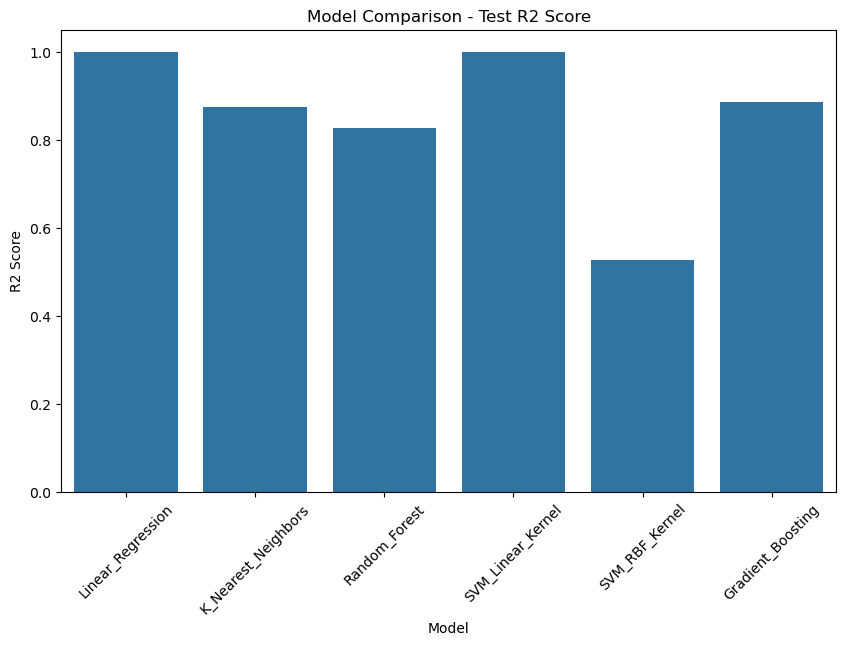

In [14]:
# Visualization - Test R2 Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["Test_R2"])
plt.title("Model Comparison - Test R2 Score")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)
plt.show()

**Type of Problem: Regression:** 

The goal of the project is to predict the total power output (Powerall) based on the positions and absorbed power outputs of WECs. This makes it a regression problem, as the target variable is continuous.

In [45]:
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from hpelm import ELM

#### 4.5.1. XGBoost Implementation

**XGBoost**

Description:
* XGBoost (Extreme Gradient Boosting) is a tree-based ensemble machine learning model that uses gradient boosting techniques.
* It builds an additive model in a forward stage-wise fashion, optimizing for a loss function.
* XGBoost is highly efficient, supports regularization to prevent overfitting, and is widely used for structured data.

Key Features:

* Handles missing values effectively.
* Provides parallelized tree construction for faster computation.
* Includes regularization (L1 and L2) to avoid overfitting.

Use Case: 

* Suitable for structured data with complex relationships, such as our dataset where spatial configurations affect power output.

In [46]:
# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Evaluate XGBoost
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

xgb_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
xgb_train_r2 = r2_score(y_train, y_train_pred_xgb)
xgb_test_r2 = r2_score(y_test, y_test_pred_xgb)

print(f"XGBoost - Train RMSE: {xgb_train_rmse}, Test RMSE: {xgb_test_rmse}")
print(f"XGBoost - Train R²: {xgb_train_r2}, Test R²: {xgb_test_r2}")

XGBoost - Train RMSE: 8587.592321519483, Test RMSE: 9687.171286952476
XGBoost - Train R²: 0.9758217163720384, Test R²: 0.9699335421269434


#### 4.5.2. Extreme Learning Machine (ELM) Implementation

**Extreme Learning Machine (ELM)**

Description:

* ELM is a single-layer feed-forward neural network (SLFN) where the weights between the input and hidden layers are randomly assigned and fixed, while the output weights are learned.
* It is computationally faster than traditional neural networks due to its simple architecture and efficient training process.

Key Features:

* Fast training compared to traditional neural networks.
* Effective for datasets with linear and non-linear relationships.

Use Case:

* ELM can be used as an alternative to neural networks when computational efficiency is required.

In [47]:
# Prepare data
elm = ELM(X_train_scaled.shape[1], 1) 
elm.add_neurons(50, "sigm")
elm.train(X_train_scaled, y_train.to_numpy().reshape(-1, 1), "r")

# Predict using ELM
y_train_pred_elm = elm.predict(X_train_scaled).flatten()
y_test_pred_elm = elm.predict(X_test_scaled).flatten()

elm_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_elm))
elm_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_elm))
elm_train_r2 = r2_score(y_train, y_train_pred_elm)
elm_test_r2 = r2_score(y_test, y_test_pred_elm)

print(f"ELM - Train RMSE: {elm_train_rmse}, Test RMSE: {elm_test_rmse}")
print(f"ELM - Train R²: {elm_train_r2}, Test R²: {elm_test_r2}")

ELM - Train RMSE: 90037.29754466633, Test RMSE: 90963.07550756626
ELM - Train R²: -1.6578320388553323, Test R²: -1.6510540382757455


#### 4.5.3. Simple Two-Layer Neural Network

**A Simple Deep Learning Model (Two Layers)**

Description:
* A basic neural network with one hidden layer and an output layer, using activation functions like ReLU in the hidden layer and linear activation for regression tasks.
* Provides flexibility in modeling complex relationships but requires careful tuning of hyperparameters to prevent overfitting.

Key Features:
* Suitable for capturing both linear and non-linear relationships in the data.
* Requires scaling of features and a sufficiently large dataset for effective learning.

Use Case:
* While simple, this model is a good baseline for understanding the dataset’s complexity and the need for deeper architectures.


In [48]:
# Initialize and train the neural network
nn_model = MLPRegressor(hidden_layer_sizes=(64,), activation='relu', solver='adam', random_state=42, max_iter=500)
nn_model.fit(X_train_scaled, y_train)

# Evaluate Neural Network
y_train_pred_nn = nn_model.predict(X_train_scaled)
y_test_pred_nn = nn_model.predict(X_test_scaled)

nn_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_nn))
nn_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_nn))
nn_train_r2 = r2_score(y_train, y_train_pred_nn)
nn_test_r2 = r2_score(y_test, y_test_pred_nn)

print(f"Neural Network - Train RMSE: {nn_train_rmse}, Test RMSE: {nn_test_rmse}")
print(f"Neural Network - Train R²: {nn_train_r2}, Test R²: {nn_test_r2}")

Neural Network - Train RMSE: 189440.6324518892, Test RMSE: 190418.74975685327
Neural Network - Train R²: -10.766001508504178, Test R²: -10.617367496645956


#### 4.5.4. Ensemble Model

**Ensemble Model**

Description:
* An ensemble combines predictions from multiple models to leverage their strengths and mitigate individual weaknesses.
* Common ensemble strategies include averaging predictions (for regression) or majority voting (for classification).

Key Features:
* Improves robustness and generalization by combining the strengths of multiple models.
* Helps reduce the variance and bias of individual models.

Top 3 Models for Ensemble:
* Based on our results from previous steps, Linear Regression, SVM (Linear Kernel), and XGBoost are the top-performing models for this dataset.
* The ensemble will combine these models to improve prediction accuracy.

Use Case:
* Ensures better performance by reducing the weaknesses of individual models and improving overall reliability.


In [50]:
# Combine top-performing models
ensemble_model = VotingRegressor(estimators=[
    ('linear', models_original["Linear_Regression"]),
    ('svm_linear', models_original["SVM_Linear_Kernel"]),
    ('xgb', xgb_model)
])

# Train ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Evaluate Ensemble Model
y_train_pred_ensemble = ensemble_model.predict(X_train_scaled)
y_test_pred_ensemble = ensemble_model.predict(X_test_scaled)

ensemble_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_ensemble))
ensemble_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ensemble))
ensemble_train_r2 = r2_score(y_train, y_train_pred_ensemble)
ensemble_test_r2 = r2_score(y_test, y_test_pred_ensemble)

print(f"Ensemble - Train RMSE: {ensemble_train_rmse}, Test RMSE: {ensemble_test_rmse}")
print(f"Ensemble - Train R²: {ensemble_train_r2}, Test R²: {ensemble_test_r2}")

Ensemble - Train RMSE: 2882.745519832934, Test RMSE: 3238.2520274987273
Ensemble - Train R²: 0.9972754471190656, Test R²: 0.9966402295868282


#### 4.5.5. Compare and Visualize Results

In [51]:
# Compile results
additional_results = {
    "XGBoost": {"Train_RMSE": xgb_train_rmse, "Test_RMSE": xgb_test_rmse, 
                "Train_R2": xgb_train_r2, "Test_R2": xgb_test_r2},
    "ELM": {"Train_RMSE": elm_train_rmse, "Test_RMSE": elm_test_rmse, 
            "Train_R2": elm_train_r2, "Test_R2": elm_test_r2},
    "Neural_Network": {"Train_RMSE": nn_train_rmse, "Test_RMSE": nn_test_rmse, 
                       "Train_R2": nn_train_r2, "Test_R2": nn_test_r2},
    "Ensemble": {"Train_RMSE": ensemble_train_rmse, "Test_RMSE": ensemble_test_rmse, 
                 "Train_R2": ensemble_train_r2, "Test_R2": ensemble_test_r2}
}

In [52]:
# Convert to DataFrame
additional_results_df = pd.DataFrame(additional_results).T
additional_results_df

,Train_RMSE,Test_RMSE,Train_R2,Test_R2
XGBoost,8587.592322,9687.171287,0.975822,0.969934
ELM,90037.297545,90963.075508,-1.657832,-1.651054
Neural_Network,189440.632452,190418.749757,-10.766002,-10.617367
Ensemble,2882.745520,3238.252027,0.997275,0.996640


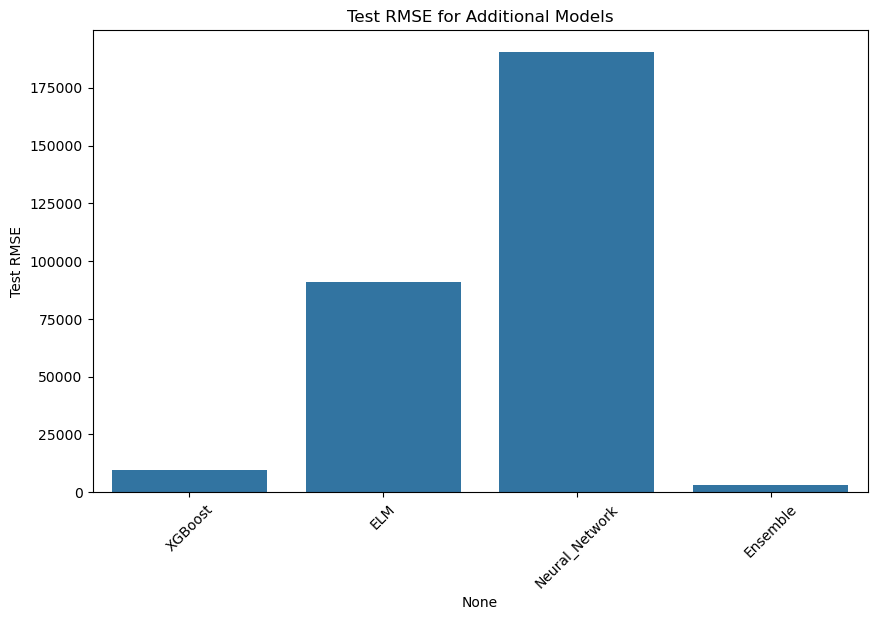

In [53]:
# Visualize Test RMSE

plt.figure(figsize=(10, 6))
sns.barplot(x=additional_results_df.index, y=additional_results_df["Test_RMSE"])
plt.title("Test RMSE for Additional Models")
plt.ylabel("Test RMSE")
plt.xticks(rotation=45)
plt.show()

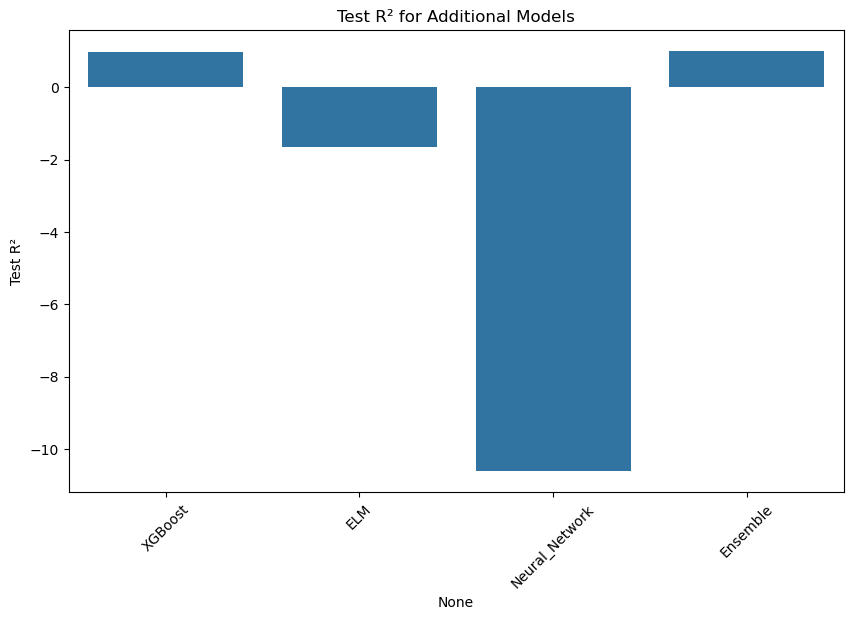

In [54]:
# Visualize Test R2

plt.figure(figsize=(10, 6))
sns.barplot(x=additional_results_df.index, y=additional_results_df["Test_R2"])
plt.title("Test R² for Additional Models")
plt.ylabel("Test R²")
plt.xticks(rotation=45)
plt.show()

**Model Performance Summary:**

1. **XGBoost:** Train RMSE: 8587.59, Test RMSE: 9687.17, Train R²: 0.9758, Test R²: 0.9699

   **Performance:** XGBoost shows excellent performance with low RMSE and high R² scores, indicating that the model fits the training data well and generalizes effectively to the test data. It is the second-best performing model after the Ensemble model.

3. **ELM (Extreme Learning Machine):** Train RMSE: 90037.30, Test RMSE: 90963.08, Train R²: -1.6578, Test R²: -1.6511

   **Performance:** The ELM model performs poorly, with very high RMSE values and negative R² scores. This indicates the model is performing worse than a simple baseline model predicting the mean of the target variable. Likely, the model is either not suitable for this dataset or not tuned properly.

5. **Neural Network:** Train RMSE: 189440.63, Test RMSE: 190418.75, Train R²: -10.7660, Test R²: -10.6174

   **Performance:** The Neural Network performs very poorly with extremely high RMSE values and significantly negative R² scores. This suggests the model has failed to learn meaningful relationships in the data, potentially due to issues like insufficient training, inappropriate architecture, or hyperparameter settings.

4. **Ensemble Model:** Train RMSE: 2882.75, Test RMSE: 3238.25, Train R²: 0.9973, Test R²: 0.9966

   **Performance:** The Ensemble model outperforms all others with the lowest RMSE and highest R² scores. This indicates that combining models has significantly improved both training and testing performance, making this the best-performing model.